In [6]:
import os
from datetime import datetime
import librosa
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy.stats import skew

In [7]:
PATH = "E:\\Data\\60k_audio_splitted_dataset\\"
SAVE_PATH = 'E:\\Data\\60k_splitted_1D_STFT_dataset\\'
os.chdir(PATH)
print(PATH)
print(SAVE_PATH)

E:\Data\60k_audio_splitted_dataset\
E:\Data\60k_splitted_1D_STFT_dataset\


In [8]:
NAV_DIR = ["train/Queen/", "train/Queenless/", "test/Queen/", "test/Queenless/", "val/Queen/", "val/Queenless/"]

In [34]:
def display_stft(stft, hop_length, cmap="jet"):
    """
    Make plots for input chroma vector using matplotlib
    """
    import librosa.display
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 6))
    db = librosa.amplitude_to_db(stft,ref=np.max)
    librosa.display.specshow(db, sr=16000, y_axis='log', x_axis='time')
    plt.show()
    return

In [35]:
def read_16k_mono(path):
    y, sr = librosa.load(path, sr=16000, mono=True)
    return y, sr

In [36]:
def stft(y, n_fft, hop_length, win_length, window, center=True):
    feature = librosa.stft(y, n_fft=n_fft, hop_length=hop_length, win_length=win_length, window = window, center=center)
    display_stft(np.abs(feature), hop_length = 4096)
    feature_mean = np.mean(np.abs(feature).T,axis=0) 
    feature_std=np.std(np.abs(feature).T,axis=0)
    # feature_min=np.min(np.abs(feature).T,axis=1)
    # feature_max=np.max(np.abs(feature).T,axis=1)
    # feature_skew = skew(np.abs(feature).T,axis=1)
    # feature_median = np.median(np.abs(feature).T,axis=1)
    # feature = np.hstack((feature_mean,feature_std,feature_min,feature_max,feature_skew,feature_median))
    feature = np.hstack((feature_mean,feature_std))
    return feature

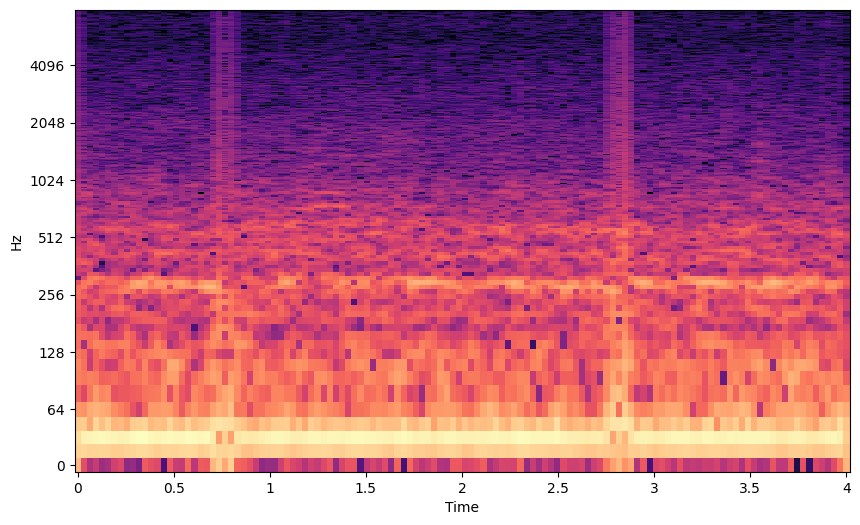

STFT feature shape:  (1026, 1)


In [37]:
FILE_PATH = os.listdir(PATH+ NAV_DIR[0])[0]
y, sr = read_16k_mono(PATH + NAV_DIR[0] + FILE_PATH)
feature = stft(y, n_fft=1024, hop_length=None, win_length=None, window = "hamming")
feature = feature.reshape(feature.shape[0], 1)
print("STFT feature shape: ", feature.shape)

**Why axis = 1 but still keep 126 columns??**

In [7]:
def data_extract_stft(path):
    data = []
    print("Extracting data from " + path)
    for file in os.listdir(path):
        if file.endswith(".wav"):
            y, sr = read_16k_mono(path + file)
            feature = stft(y, n_fft=1024, hop_length=None, win_length=None, window = "hamming")
            data.append(feature)
    print(f"Extracted {len(data)} files from {path}")
    return data

In [8]:
DATA = []
time0 = datetime.now()
for SUB_PATH in NAV_DIR:
    sub_data = data_extract_stft(PATH + SUB_PATH)
    DATA.append(sub_data)
time1 = datetime.now()
extract_time = (time1 - time0).seconds / 60
print('Extract time: %.2f minutes' % extract_time)

Extracting data from E:\Data\60k_audio_splitted_dataset\train/Queen/
Extracted 20000 files from E:\Data\60k_audio_splitted_dataset\train/Queen/
Extracting data from E:\Data\60k_audio_splitted_dataset\train/Queenless/
Extracted 19999 files from E:\Data\60k_audio_splitted_dataset\train/Queenless/
Extracting data from E:\Data\60k_audio_splitted_dataset\test/Queen/
Extracted 5000 files from E:\Data\60k_audio_splitted_dataset\test/Queen/
Extracting data from E:\Data\60k_audio_splitted_dataset\test/Queenless/
Extracted 5000 files from E:\Data\60k_audio_splitted_dataset\test/Queenless/
Extracting data from E:\Data\60k_audio_splitted_dataset\val/Queen/
Extracted 5000 files from E:\Data\60k_audio_splitted_dataset\val/Queen/
Extracting data from E:\Data\60k_audio_splitted_dataset\val/Queenless/
Extracted 5000 files from E:\Data\60k_audio_splitted_dataset\val/Queenless/
Extract time: 12.80 minutes


In [9]:
print(np.array(DATA[0]).shape)

(20000, 1026)


In [10]:
for index in range(len(DATA)):
    np.save(SAVE_PATH + NAV_DIR[index] + NAV_DIR[index].split('/')[-2] + '_STFT.npy', np.array(DATA[index]))
    print('Saved ' + NAV_DIR[index].split('/')[-2] + '_STFT.npy')

Saved Queen_STFT.npy
Saved Queenless_STFT.npy
Saved Queen_STFT.npy
Saved Queenless_STFT.npy
Saved Queen_STFT.npy
Saved Queenless_STFT.npy


In [11]:
# def data_extract_stft(PATH, SUB_PATH):
#     path = PATH + SUB_PATH
#     print("Extracting data from " + path)
#     for file in os.listdir(path):
#         if file.endswith(".wav"):
#             y, sr = read_16k_mono(path + file)
#             spectrogram = librosa.stft(y, n_fft=1024, hop_length=None, win_length=None, window='hamming', center=True)
#             D = librosa.amplitude_to_db(spectrogram, ref=np.max)
#             plt.ioff()
#             plt.figure(figsize=(14, 5))
#             plt.pcolormesh(D, cmap='viridis', vmin=-80, vmax=0)
#             plt.tight_layout(pad = 0)
#             plt.axis('off')
#             plt.savefig(SAVE_PATH + SUB_PATH + file[:-4] + '.png', bbox_inches='tight', pad_inches=0)
#             plt.close()
#     print(f"Extracted {len(data)} files from {path}")

In [12]:
# PATH = 'C:\\Data_Lab\\120k_splitted_dataset\\'
# SAVE_PATH = 'C:\\Data_Lab\\120k_STFT_Spectrogram\\'
# os.chdir(PATH)